In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# to import the dataset
df1 = pd.read_csv("/content/20122013.csv")
df2 = pd.read_csv("/content/20132014.csv")
df3 = pd.read_csv("/content/20142015.csv")
df4 = pd.read_csv("/content/20152016.csv")
df5 = pd.read_csv("/content/20162017.csv")
df6 = pd.read_csv("/content/20172018.csv")
df7 = pd.read_csv("/content/20182019.csv")
df8 = pd.read_csv("/content/20192020.csv")
df9 = pd.read_csv("/content/20202021.csv")
df10 = pd.read_csv("/content/20212022.csv")
df11 = pd.read_csv("/content/20222023.csv")
df12 = pd.read_csv("/content/20232024.csv", encoding = "latin-1")

**DATA PREPROCESSING**

In [ ]:
#merging all datasets together
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

In [ ]:
df.shape

(258905, 8)

In [ ]:
df.columns

Index(['Financial_Year', 'Financial_Quarter', 'Force_Name',
       'Offence_Description', 'Offence_Group', 'Offence_Subgroup',
       'Offence_Code', 'Number_of_Offences'],
      dtype='object')

In [ ]:
df.info()
#provides information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258905 entries, 0 to 6382
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Financial_Year       258905 non-null  object
 1   Financial_Quarter    258905 non-null  int64 
 2   Force_Name           258905 non-null  object
 3   Offence_Description  258905 non-null  object
 4   Offence_Group        258905 non-null  object
 5   Offence_Subgroup     258905 non-null  object
 6   Offence_Code         258905 non-null  object
 7   Number_of_Offences   258905 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 17.8+ MB


In [ ]:
df.isnull().sum()
#checking for missing values

Financial_Year         0
Financial_Quarter      0
Force_Name             0
Offence_Description    0
Offence_Group          0
Offence_Subgroup       0
Offence_Code           0
Number_of_Offences     0
dtype: int64

**From the analyses, I was able to discover that there was no missing data using Pandas**

In [ ]:
#Checking the data type for Number of Offences
df["Number_of_Offences"].dtype

dtype('int64')

**DATA CLEANING**

In [ ]:
df["Financial_Year"].unique()

array(['2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18',
       '2018/19', '2019/20', '2020/21', '2021/22', '2022/23', '2023/24'],
      dtype=object)

In [ ]:
df["Financial_Quarter"].unique()

array([1, 2, 3, 4])

In [ ]:
df["Force_Name"].unique()

array(['Action Fraud', 'Avon and Somerset', 'Bedfordshire',
       'British Transport Police', 'Cambridgeshire', 'Cheshire', 'CIFAS',
       'Cleveland', 'Cumbria', 'Derbyshire', 'Devon and Cornwall',
       'Dorset', 'Durham', 'Dyfed-Powys', 'Essex',
       'Financial Fraud Action UK', 'Gloucestershire',
       'Greater Manchester', 'Gwent', 'Hampshire', 'Hertfordshire',
       'Humberside', 'Kent', 'Lancashire', 'Leicestershire',
       'Lincolnshire', 'London, City of', 'Merseyside',
       'Metropolitan Police', 'Norfolk', 'North Wales', 'North Yorkshire',
       'Northamptonshire', 'Northumbria', 'Nottinghamshire',
       'South Wales', 'South Yorkshire', 'Staffordshire', 'Suffolk',
       'Surrey', 'Sussex', 'Thames Valley', 'Warwickshire', 'West Mercia',
       'West Midlands', 'West Yorkshire', 'Wiltshire', 'Cifas',
       'UK Finance'], dtype=object)

In [ ]:
df["Offence_Description"].unique()

array(['Fraud offences recorded by Action Fraud',
       'Abandoning child under two years (outcomes only)',
       'Absconding from lawful custody',
       'Abuse of children through prostitution and pornography',
       'Abuse of position of trust of a sexual nature',
       'Actually bodily harm and other injury(outcomes only)',
       'Adulteration of food (outcomes only)',
       'Aggravated burglary in a building other than a dwelling',
       'Aggravated burglary in a dwelling', 'Aggravated vehicle taking',
       'Aiding suicide', 'Arson endangering life',
       'Arson not endangering life', 'Assault with injury',
       'Assault with intent to cause serious harm',
       'Assault without injury', 'Assault without injury on a constable',
       'Attempted burglary in a building other than a dwelling',
       'Attempted burglary in a dwelling',
       'Attempted distraction burglary in a dwelling', 'Attempted murder',
       'Bail offences', 'Bankruptcy and insolvency (outcomes

It was observed that two Offence description were wrongly written

1. Attempted residential burglary of\xa0unconnected building
2. Residential burglary of\xa0unconnected building

Applying corrections

In [ ]:
replace_dict = {"Attempted residential burglary of\xa0unconnected building": "Attempted residential burglary of unconnected building", "Residential burglary of\xa0unconnected building" : "Residential burglary of unconnected building"}
df["Offence_Description"].replace(replace_dict, inplace=True)

In [ ]:
df["Offence_Description"].unique()

array(['Fraud offences recorded by Action Fraud',
       'Abandoning child under two years (outcomes only)',
       'Absconding from lawful custody',
       'Abuse of children through prostitution and pornography',
       'Abuse of position of trust of a sexual nature',
       'Actually bodily harm and other injury(outcomes only)',
       'Adulteration of food (outcomes only)',
       'Aggravated burglary in a building other than a dwelling',
       'Aggravated burglary in a dwelling', 'Aggravated vehicle taking',
       'Aiding suicide', 'Arson endangering life',
       'Arson not endangering life', 'Assault with injury',
       'Assault with intent to cause serious harm',
       'Assault without injury', 'Assault without injury on a constable',
       'Attempted burglary in a building other than a dwelling',
       'Attempted burglary in a dwelling',
       'Attempted distraction burglary in a dwelling', 'Attempted murder',
       'Bail offences', 'Bankruptcy and insolvency (outcomes

In [ ]:
df["Offence_Group"].unique()

array(['Fraud offences', 'Violence against the person',
       'Miscellaneous crimes against society', 'Sexual offences',
       'Theft offences', 'Criminal damage and arson', 'Drug offences',
       'Possession of weapons offences', 'Public order offences',
       'Robbery'], dtype=object)

In [ ]:
df["Offence_Subgroup"].unique()

array(['Fraud: Action Fraud', 'Violence without injury',
       'Miscellaneous crimes against society', 'Other sexual offences',
       'Violence with injury', 'Non-domestic burglary',
       'Domestic burglary', 'Theft of a motor vehicle', 'Arson',
       'Fraud offences to 2012/13', 'Other theft offences',
       'Criminal damage', 'Homicide', 'Vehicle interference',
       'Possession of drugs', 'Possession of weapons offences',
       'Public order offences', 'Rape offences',
       'Robbery of business property', 'Robbery of personal property',
       'Shoplifting', 'Theft from the person', 'Theft from a vehicle',
       'Bicycle theft', 'Trafficking of drugs', 'Fraud: CIFAS',
       'Fraud: Financial Fraud Action UK',
       'Death or serious injury - unlawful driving',
       'Stalking and harassment', 'Fraud: action fraud',
       'Fraud: UK Finance'], dtype=object)

In [ ]:
df.describe()

,Financial_Quarter,Number_of_Offences
count,258905.000000,258905.000000
mean,2.463031,229.901837
std,1.128399,1724.363276
min,1.000000,-268.000000
25%,1.000000,0.000000
50%,2.000000,9.000000
75%,3.000000,83.000000
max,4.000000,132693.000000


**Outliners discovered in Number of Offences**
- We can't have number of offences being a negative number (<0)

In [ ]:
df[df["Number_of_Offences"] < 0]

,Financial_Year,Financial_Quarter,Force_Name,Offence_Description,Offence_Group,Offence_Subgroup,Offence_Code,Number_of_Offences
407,2012/13,1,British Transport Police,Preserved other fraud and repealed fraud offen...,Fraud offences,Fraud offences to 2012/13,53B,-1
715,2012/13,1,Cheshire,Preserved other fraud and repealed fraud offen...,Fraud offences,Fraud offences to 2012/13,53B,-3
6835,2012/13,2,Avon and Somerset,Fraud by company director (outcomes only),Fraud offences,Fraud offences to 2012/13,51,-1
6865,2012/13,2,Avon and Somerset,Perjury,Miscellaneous crimes against society,Miscellaneous crimes against society,67,-1
6878,2012/13,2,Avon and Somerset,Preserved other fraud and repealed fraud offen...,Fraud offences,Fraud offences to 2012/13,53B,-15
...,...,...,...,...,...,...,...,...
20355,2018/19,4,"London, City of",Endangering life,Violence against the person,Violence with injury,5E,-1
20377,2018/19,4,"London, City of",Other drug offences,Drug offences,Possession of drugs,92C,-1
20395,2018/19,4,"London, City of",Profiting from or concealing knowledge of the ...,Miscellaneous crimes against society,Miscellaneous crimes against society,38,-2
20415,2018/19,4,"London, City of",Sexual assault on a male aged 13 and over,Sexual offences,Other sexual offences,17A,-1


**So we have a total of 426 rows with negative numbers for number of offences**

**Dropping the negative numbers**

In [ ]:
#dropping the ouliners
df = df[df["Number_of_Offences"] >= 0]

In [ ]:
df.shape

(258479, 8)

**Research Questions**
1. To determine the offence group with the most offences.
2. To find number times an offence code appeared.
3. Force Name involved in the highest number of crimes committed.

**RESEARCH QUESTION 1**

In [ ]:
df.groupby(df["Offence_Group"])["Number_of_Offences"].sum().sort_values()

Offence_Group
Possession of weapons offences            419560
Robbery                                   758697
Miscellaneous crimes against society      964614
Sexual offences                          1502567
Drug offences                            1956518
Public order offences                    4029470
Criminal damage and arson                6040693
Fraud offences                           8278687
Violence against the person             15518904
Theft offences                          20054697
Name: Number_of_Offences, dtype: int64

From the analyses, it was discovered that **Theft offences** was the most committed crime with over 20 million crime offenses as **Possession of weapons offences** came least with over 400 thousand crime offenses

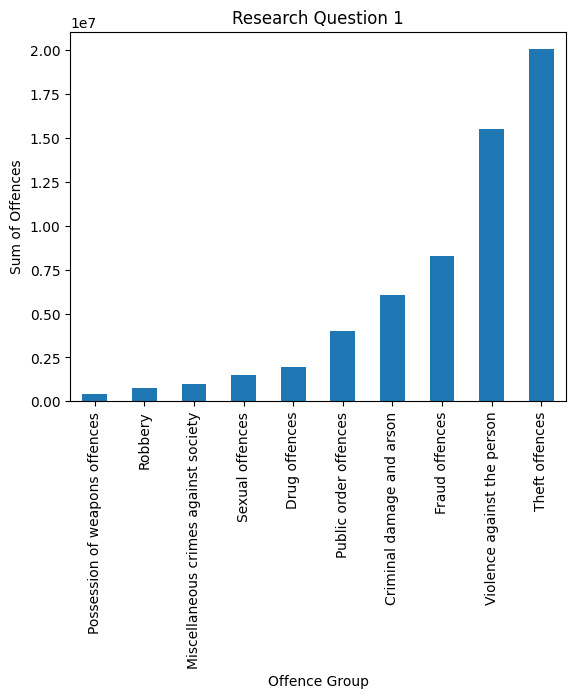

In [ ]:
group_rq1= df.groupby("Offence_Group")["Number_of_Offences"].sum().sort_values()
group_rq1.plot.bar()
plt.ylabel("Sum of Offences")
plt.xlabel("Offence Group")
plt.title("Research Question 1")
plt.show()

**RESEARCH QUESTION 2**

In [ ]:
# To find number times an offence code appeared.
df["Offence_Code"].value_counts().head(10)

4.1    3605
802    1980
54     1980
58B    1980
58A    1980
58C    1980
11A    1980
46     1980
43     1980
28C    1980
Name: Offence_Code, dtype: int64

From the analyses, **Violence against the person** recorded higher number of occurences with 0 number of offences while **Robbery** recorded the least

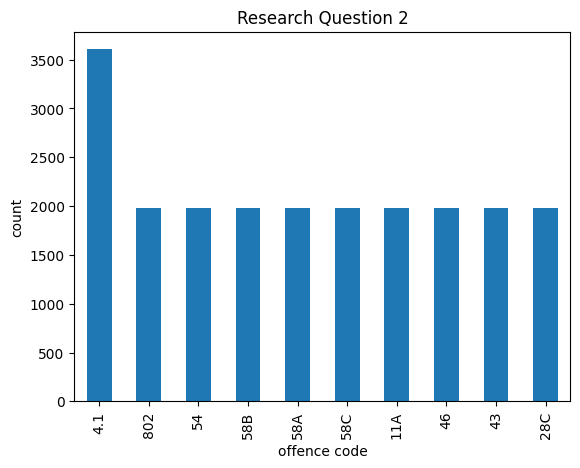

In [ ]:
group_rq2 = df["Offence_Code"].value_counts().head(10)
group_rq2.plot(kind = "bar")
plt.ylabel("count")
plt.xlabel("offence code")
plt.title("Research Question 2")
plt.show()

**RESEARCH QUESTION 3**

In [ ]:
#Finding the Force Name involved in the highest number of crimes committed
df.groupby("Force_Name")["Number_of_Offences"].sum().sort_values()

Force_Name
London, City of                68079
Dyfed-Powys                   321478
Cumbria                       343605
Warwickshire                  408936
Gloucestershire               417484
Wiltshire                     443198
North Yorkshire               458475
Lincolnshire                  510450
Bedfordshire                  518159
Dorset                        522780
Financial Fraud Action UK     523390
Gwent                         525375
Suffolk                       531121
North Wales                   560945
Durham                        565120
British Transport Police      609130
Norfolk                       617978
Northamptonshire              618515
Cleveland                     654395
Cambridgeshire                660475
Derbyshire                    730685
Surrey                        733058
Hertfordshire                 793224
Staffordshire                 833262
Cheshire                      845868
West Mercia                   873201
Leicestershire             

The **Metropolitan Police** were involved with the most number of crimes while **London, City of** had the least number of crimes

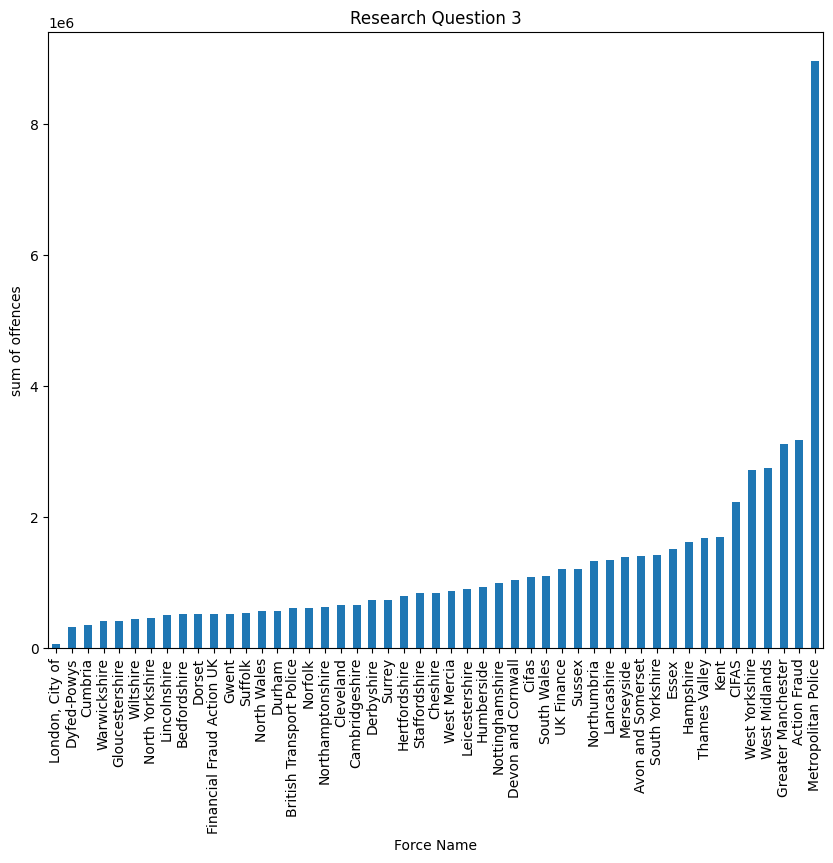

In [ ]:
group_rq3 = df.groupby("Force_Name")["Number_of_Offences"].sum().sort_values()
plt.figure(figsize=(10,8))
group_rq3.plot.bar()
plt.ylabel("sum of offences")
plt.xlabel("Force Name")
plt.title("Research Question 3")
plt.show()

In [ ]:
df.drop(["Financial_Year", "Financial_Quarter", "Offence_Code", "Number_of_Offences"], axis=1, inplace=True)

In [ ]:
df.head()

,Force_Name,Offence_Description,Offence_Group,Offence_Subgroup
0,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud
2,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society
4,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences
7,Avon and Somerset,Aggravated burglary in a building other than a...,Theft offences,Non-domestic burglary
8,Avon and Somerset,Aggravated burglary in a dwelling,Theft offences,Domestic burglary


**Encoding all categorical values to Numerical values**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df["Force_Name"] = le.fit_transform(df["Force_Name"])
df["Offence_Description"] = le.fit_transform(df["Offence_Description"])
df["Offence_Group"] = le.fit_transform(df["Offence_Group"])
df["Offence_Subgroup"] = le.fit_transform(df["Offence_Subgroup"])

In [ ]:
df.head()

,Force_Name,Offence_Description,Offence_Group,Offence_Subgroup
0,0,90,2,6
1,1,0,9,30
2,1,1,3,12
3,1,2,7,14
4,1,4,7,14


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(["Offence_Group"], axis = 1)
y = df["Offence_Group"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

**Importing all three ML algorithms for Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
#For Decision Tree Classfier
dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train,y_train)

In [ ]:
dt_model_prediction = dt.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
data_accuracy = accuracy_score(dt_model_prediction, y_test)

In [ ]:
print(data_accuracy)

1.0


In [ ]:
#For Random Forest Classfier
rf = RandomForestClassifier()
rf_model = rf.fit(x_train,y_train)

In [ ]:
rf_model_prediction = rf.predict(x_test)

In [ ]:
data_accuracy_rf = accuracy_score(rf_model_prediction, y_test)

In [ ]:
print(data_accuracy_rf)

1.0


In [ ]:
#For Support Vector Machines
sv = SVC()
sv_model = sv.fit(x_train,y_train)

In [ ]:
sv_model_prediction = sv.predict(x_test)

In [ ]:
data_accuracy_sv = accuracy_score(sv_model_prediction, y_test)

In [ ]:
print(data_accuracy_sv)